<a href="https://colab.research.google.com/github/duydung271/MachineLearning/blob/main/Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transfer Learning



##1.   Giới thiệu chung

###1.1 Nguyên nhân mô hình dự báo kém
Giả sử rằng chúng ta bỏ qua những vấn đề liên quan đến sự cố dữ liệu như gán nhãn sai, ảnh mập mờ, bị che khuất, vân vân,…. Thông thường mô hình dự báo kém là do:

- **Dữ liệu nhỏ không đại diện:** Bộ dữ liệu của chúng ta có kích thước quá bé. Do đó mô hình được huấn luyện không học được các đặc trưng tổng quát để áp dụng vào các tác vụ phân loại.

- **Quá trình tối ưu hóa gặp khó khăn:** Có thể bạn đã thiết lập learning rate chưa tốt nên khiến mô hình huấn luyện lâu hội tụ hoặc chưa đạt tới điểm global optimal.

- **Mô hình mất cân bằng dữ liệu**

- **Kiến trúc mô hình quá phức tạp**


###1.2 Vai trò của transfer learning

####1.2.1 Chuyển giao tri thức

Một mô hình đã có khả năng tận dụng lại các tri thức đã huấn luyện trước đó và cải thiện lại trên tác vụ phân loại của nó.


####1.2.2 Cải thiện accuracy và tiết kiệm chi phí huấn luyện

![transfer learning](https://phamdinhkhanh.github.io/assets/images/20200415_TransferLearning/pic1.jpg)

Từ đồ thị ta có thể thấy sử dụng transfer learning sẽ mang lại 3 lợi thế chính:

- Có điểm khởi đầu của accuracy tốt hơn (higher start).
- Accuracy có tốc độ tăng nhanh hơn (higher slope).
- Đường tiệm cận của độ chính xác tối ưu cao hơn (higher asymptote).


###1.2.3 Hiệu quả với dữ liệu nhỏ

Trong trường hợp bộ dữ liệu có kích thước quá nhỏ và khó có thể tìm kiếm và mở rộng thêm thì các mô hình được huấn luyện từ chúng sẽ khó có thể dự báo tốt. Tận dụng lại tri thức từ các pretrained-model với cùng tác vụ phân loại sẽ giúp các mô hình được huấn luyện dự báo tốt hơn với dữ liệu mới vì mô hình được học trên cả 2 nguồn tri thức đó là dữ liệu huấn luyện và dữ liệu mà nó đã được học trước đó.

##2. Transfer Learning

Có 2 loại transfer learning:

- **Feature extractor:** Sau khi lấy ra các đặc điểm của ảnh bằng việc sử dụng ConvNet của pre-trained model, thì ta sẽ dùng linear classifier (linear SVM, softmax classifier,..) để phân loại ảnh. Hiểu đơn giản thì các đặc điểm ảnh (tai, mũi, tóc,…) giờ như input của bài toán linear regression hay logistic regression. 

- **Fine tuning:** Sau khi lấy ra các đặc điểm của ảnh bằng việc sử dụng ConvNet của pre-trained model, thì ta sẽ coi đây là input của 1 CNN mới bằng cách thêm các ConvNet và Fully Connected layer. Lý do là ConvNet của VGGFace 2 model có thể lấy ra được các thuộc tính của mặt người nói chung nhưng người Việt Nam có nhưng đặc tính khác nên cần thêm 1 số Convnet mới để học thêm các thuộc tính của người Việt Nam.

#####**Feature extractor**

Ta chỉ giữ lại phần ConvNet trong CNN và bỏ đi FCs. Sau đó dùng output của ConvNet còn lại để làm input cho Logistic Regression với nhiều output. 

![Image](https://i0.wp.com/nttuan8.com/wp-content/uploads/2019/04/featureExtractor.png?w=666&ssl=1)

Mô hình **logistic regression** với nhiều output có 2 dạng:

- **Dạng thứ nhất** là một neural network, không có hidden layer, hàm **activation** ở output layer là **softmax function**, loss **function** là hàm **categorical-cross entropy**, giống như bài phân loại ảnh.

- **Dạng thứ hai** giống như bài **logistic regression**, tức là **model** chỉ phân loại 2 class. Mỗi lần ta sẽ phân loại 1 class với tất cả các class còn lại.

![Image](https://i0.wp.com/nttuan8.com/wp-content/uploads/2019/04/1vsAll.png?resize=768%2C428&ssl=1)

#####**Fine tuning**
Ta chỉ giữ lại phần ConvNet trong CNN và bỏ đi FCs. Sau đó thêm các Fully Connected layer mới vào output của ConvNet.

![Fine turning](https://i2.wp.com/nttuan8.com/wp-content/uploads/2019/04/fine-tune.png?w=489&ssl=1)

Khi train model ta chia làm 2 giai đoạn:
- **Giai đoạn 1:[Warm up]** Vì các **fully connected layer ta mới thêm vào có các hệ số được khởi tạo ngẫu nhiên** tuy nhiên các layer trong ConvNet của **pre-trained model đã được train** với ImageNet dataset nên ta sẽ không train (đóng băng/freeze) trên các layer trong ConvNet của model VGG16. Sau khoảng 20-30 epoch thì các hệ số ở các layer mới đã được học từ dữ liệu thì ta chuyển sang giai đoạn 2.

![Freeze](https://i0.wp.com/nttuan8.com/wp-content/uploads/2019/04/freeze_part.png?w=446&ssl=1)

Mục đích chính của việc warm up model là để mô hình hội tụ nhanh hơn tới global optimal value.

- **Giai đoạn 2:** Ta sẽ **unfreeze các layer trên ConvNet** của pre-trained model và train trên các layer của ConvNet của pre-trained model và các layer mới. Bạn có thể unfreeze tất cả các layer trong ConvNet của VGG16 hoặc chỉ unfreeze một vài layer cuối tùy vào thời gian và GPU bạn có.

![Unfreeze](https://i0.wp.com/nttuan8.com/wp-content/uploads/2019/04/unfreeze_all.png?w=405&ssl=1)

Accuracy của fine-tuning tốt hơn so với feature extractor tuy nhiên thời gian train của fine-tuning cũng lâu hơn rất nhiều.

**Khi nào nên dùng transfer learning**

![Exprerience](https://phamdinhkhanh.github.io/assets/images/20200415_TransferLearning/pic5.jpg)

Có 2 yếu tố quan trọng nhất để dùng transfer learning đó là kích thước của dữ liệu bạn có và sự tương đồng của dữ liệu giữa mô hình bạn cần train và pre-trained model. 

- Dữ liệu bạn có nhỏ và tương tự với dữ liệu ở pre-trained model. Vì dữ liệu nhỏ nên nếu dùng fine-tuning thì model sẽ bị overfitting. Hơn nữa là dữ liệu tương tự nhau nên là ConvNet của pre-trained model cũng lấy ra các đặc điểm ở dữ liệu của chúng ta. Do đó nên dùng feature extractor.

- Dữ liệu bạn có lớn và tương tự với dữ liệu ở pre-trained model. Giờ có nhiều dữ liệu ta không sợ overfitting do đó nên dùng fine-tuning.

- Dữ liệu bạn có nhỏ nhưng khác với dữ liệu ở pre-trained model. Vì dữ liệu nhỏ nên ta lên dùng feature extractor để tránh overfitting. Tuy nhiên do dữ liệu ta có và dữ liệu ở pre-trained model khác nhau, nên không nên dùng feature extractor với toàn bộ ConvNet của pre-trained model mà chỉ dùng các layer đầu. Lý do là vì các layer ở phía trước sẽ học các đặc điểm chung chung hơn (cạnh, góc,…), còn các layer phía sau trong ConvNet sẽ học các đặc điểm cụ thể hơn trong dataset (ví dụ mắt, mũi,..).

- Dữ liệu bạn có lớn và khác với dữ liệu ở pre-trained model. Ta có thể train model từ đầu, tuy nhiên sẽ tốt hơn nếu ta khởi tạo các giá trị weight của model với giá trị của pre-trained model và sau đó train bình thường.

**Lưu ý**

- Vì pre-trained model đã được train với kích thước ảnh cố định, nên khi dùng pre-trained model ta cần resize lại ảnh có kích ảnh bằng kích thước mà ConvNet của pre-trained model yêu cầu.

- Hệ số learning rate của ConvNet của pre-trained model nên được đặt với giá trị nhỏ vì nó đã được học ở pre-trained model nên ít cần cập nhật hơn so với các layer mới thêm.






##3.   Data augmentation

Ngoài transfer learning, có một kĩ thuật nữa giải quyết vấn đề có ít dữ liệu cho việc training model, đó là data augmentation. Augmentation là kĩ thuật tạo ra dữ liệu training từ dữ liệu mà ta đang có.

![Data augmentation](https://phamdinhkhanh.github.io/assets/images/20200415_TransferLearning/TransferLearning_26_1.png)

Ta có thể thấy với cùng một bức ảnh nhưng đã sinh ra khá nhiều biến thể. Các thay đổi tập trung chủ yếu ở 3 khía cạnh:

- Góc xoay của ảnh.
- Cường độ sáng của ảnh.
- Mức độ phóng đại của ảnh.



##4.   Huấn luyện model

###1. Dataset

In [ ]:
from google.colab import drive
import os

drive.mount("/content/drive")
path = '/content/drive/MyDrive/Colab Notebooks/Data'
os.chdir(path)
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Train_Data']

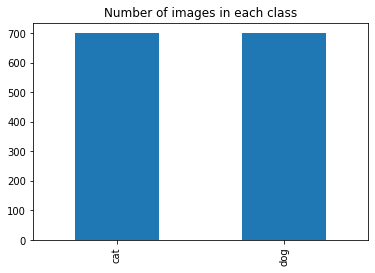

In [ ]:
import pandas as pd
import glob2
import matplotlib.pyplot as plt

dogs = glob2.glob('Train_Data/dog/*.jpg')
dog_labels = ['dog']*len(dogs)
cats = glob2.glob('Train_Data/cat/*.jpg')
cat_labels = ['cat']*len(cats)

labels = dog_labels + cat_labels
image_links = dogs + cats

data = pd.DataFrame({'labels': labels, 'image_links':image_links})

data.groupby(labels).image_links.count().plot.bar()
plt.title('Number of images in each class')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

images_train, images_val, y_label_train, y_label_val = train_test_split(image_links, labels, stratify = labels)

print('images_train len: {}, image_test shape: {}'.format(len(images_train), len(images_val)))

images_train len: 1049, image_test shape: 350


In [ ]:
import numpy as np
from tensorflow.keras.utils import Sequence, to_categorical
import cv2

class DataGenerator(Sequence):
    'Generates data for Keras'
    def __init__(self,
                 all_filenames, 
                 labels, 
                 batch_size, 
                 index2class,
                 input_dim,
                 n_channels,
                 n_classes=2, 
                 normalize=True,
                 zoom_range=[0.8, 1],
                 rotation=15,
                 brightness_range=[0.8, 1],
                 shuffle=True):
        '''
        all_filenames: list toàn bộ các filename
        labels: nhãn của toàn bộ các file
        batch_size: kích thước của 1 batch
        index2class: index của các class
        input_dim: (width, height) đầu vào của ảnh
        n_channels: số lượng channels của ảnh
        n_classes: số lượng các class 
        normalize: có chuẩn hóa ảnh hay không?
        zoom_range: khoảng scale zoom là một khoảng nằm trong [0, 1].
        rotation: độ xoay ảnh.
        brightness_range: Khoảng biến thiên cường độ sáng
        shuffle: có shuffle dữ liệu sau mỗi epoch hay không?
        '''
        self.all_filenames = all_filenames
        self.labels = labels
        self.batch_size = batch_size
        self.index2class = index2class
        self.input_dim = input_dim
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.normalize = normalize
        self.zoom_range = zoom_range
        self.rotation = rotation
        self.brightness_range = brightness_range
        self.on_epoch_end()

    def __len__(self):
        '''
        return:
          Trả về số lượng batch/1 epoch
        '''
        return int(np.floor(len(self.all_filenames) / self.batch_size))

    def __getitem__(self, index):
        '''
        params:
          index: index của batch
        return:
          X, y cho batch thứ index
        '''
        # Lấy ra indexes của batch thứ index
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # List all_filenames trong một batch
        all_filenames_temp = [self.all_filenames[k] for k in indexes]

        # Khởi tạo data
        X, y = self.__data_generation(all_filenames_temp)

        return X, y

    def on_epoch_end(self):
        '''
        Shuffle dữ liệu khi epochs end hoặc start.
        '''
        self.indexes = np.arange(len(self.all_filenames))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, all_filenames_temp):
        '''
        params:
          all_filenames_temp: list các filenames trong 1 batch
        return:
          Trả về giá trị cho một batch.
        '''
        X = np.empty((self.batch_size, *self.input_dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Khởi tạo dữ liệu
        for i, fn in enumerate(all_filenames_temp):
            # Đọc file từ folder name
            img = cv2.imread(fn)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, self.input_dim)
            img_reshape = img.reshape(-1, 3)
            
            if self.normalize:
              mean = np.mean(img_reshape, axis=0)
              std = np.std(img_reshape, axis=0)
              img = (img-mean)/std

            if self.zoom_range:
              zoom_scale = 1/np.random.uniform(self.zoom_range[0], self.zoom_range[1])
              (h, w, c) = img.shape
              img = cv2.resize(img, (int(h*zoom_scale), int(w*zoom_scale)), interpolation = cv2.INTER_LINEAR)
              (h_rz, w_rz, c) = img.shape
              start_w = np.random.randint(0, w_rz-w) if (w_rz-w) > 0 else 0
              start_h = np.random.randint(0, h_rz-h) if (h_rz-h) > 0 else 0
              # print(start_w, start_h)
              img = img[start_h:(start_h+h), start_w:(start_w+w), :].copy()
            
            if self.rotation:
              (h, w, c) = img.shape
              angle = np.random.uniform(-self.rotation, self.rotation)
              RotMat = cv2.getRotationMatrix2D(center = (w, h), angle=angle, scale=1)
              img = cv2.warpAffine(img, RotMat, (w, h))

            if self.brightness_range:
              scale_bright = np.random.uniform(self.brightness_range[0], self.brightness_range[1])
              img = img*scale_bright
            
            label = 'dog' if 'dog' in fn else 'cat'
            label = self.index2class[label]
    
            X[i,] = img

            # Lưu class
            y[i] = label
        return X, y

dict_labels = {
    'dog': 0,
    'cat': 1
}

train_generator = DataGenerator(
    all_filenames = images_train,
    labels = y_label_train,
    batch_size = 32,
    index2class = dict_labels,
    input_dim = (224, 224),
    n_channels = 3,
    n_classes = 2,
    normalize = False,
    zoom_range = [0.5, 1],
    rotation = False,
    brightness_range=[0.8, 1],
    shuffle = True
)

val_generator = DataGenerator(
    all_filenames = images_val,
    labels = y_label_val,
    batch_size = 16,
    index2class = dict_labels,
    input_dim = (224, 224),
    n_channels = 3,
    n_classes = 2,
    normalize = False,
    zoom_range = [0.5, 1],
    rotation = False,
    brightness_range =[0.8, 1],
    shuffle = False
)

In [ ]:
check_aug=['Train_Data/cat/cat.100.jpg']*32

check_generator = DataGenerator(
    all_filenames = check_aug,
    labels = y_label_val,
    batch_size = 20,
    index2class = dict_labels,
    input_dim = (224, 224),
    n_channels = 3,
    n_classes = 2,
    normalize = False,
    zoom_range = [0.5, 1],
    rotation = 15,
    brightness_range = [0.5, 1.5],
    shuffle = False
)

In [ ]:
X_batch, y_batch = check_generator.__getitem__(0)

print(X_batch.shape)
print(y_batch.shape)

(20, 224, 224, 3)
(20,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

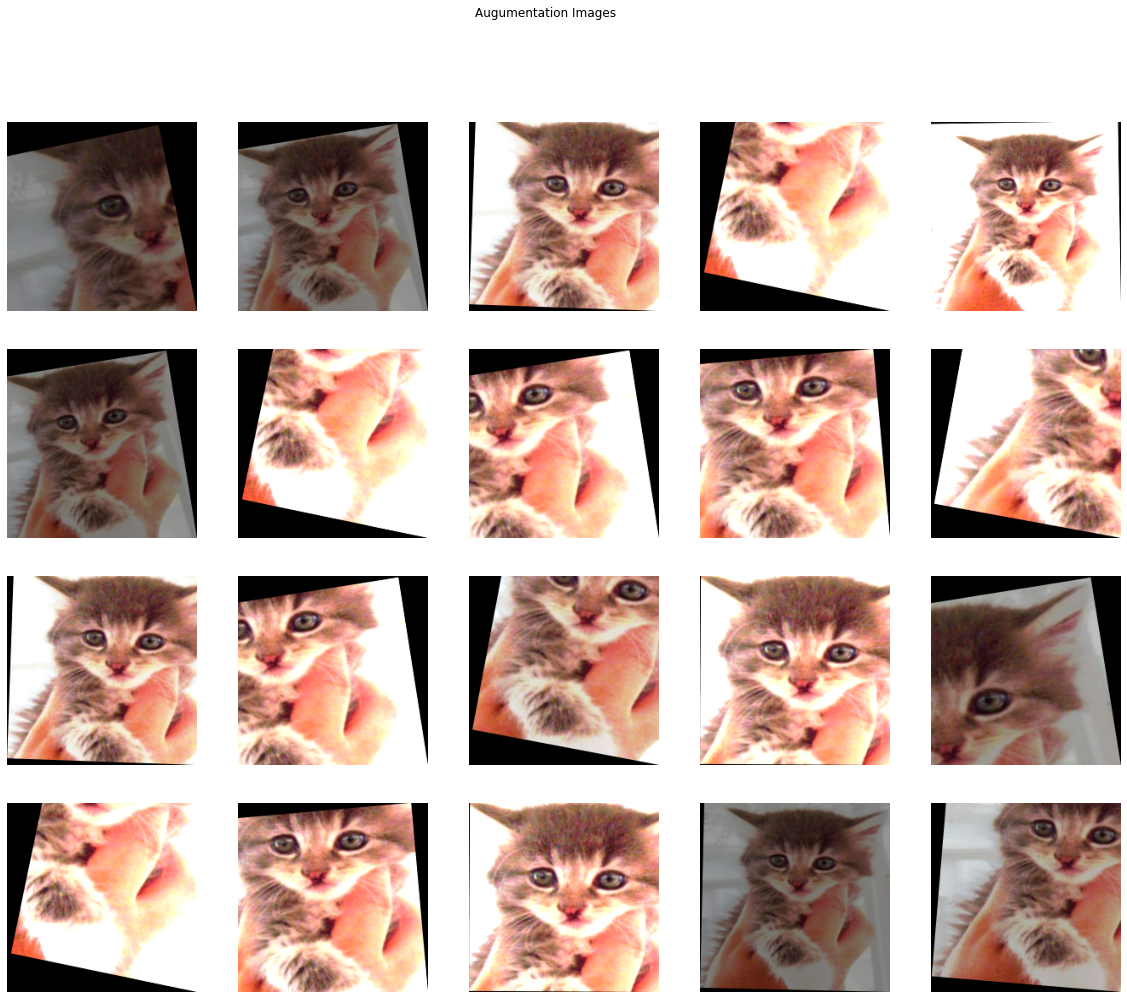

In [ ]:
import matplotlib.pyplot as plt

# Khởi tạo subplot với 4 dòng 5 cột.
fg, ax = plt.subplots(4, 5, figsize=(20, 16))
fg.suptitle('Augumentation Images')

for i in np.arange(4):
  for j in np.arange(5):
    ax[i, j].imshow(X_batch[i + j + j*i]/255.0)
    ax[i, j].set_xlabel('Image '+str(i+j+j*i))
    ax[i, j].axis('off')
plt.show()

###2.Training Model

In [ ]:
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam


base_network = MobileNet(input_shape=(224, 224, 3), include_top = False, weights = 'imagenet')
flat = Flatten()
den = Dense(1, activation='sigmoid')

model = Sequential([base_network, 
                    flat,
                    den])
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics = ['accuracy'])
model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 50177     
Total params: 3,279,041
Trainable params: 3,257,153
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:
# Frozen base_network
for layer in model.layers[:1]:
  layer.trainable = False

for layer in model.layers:
  print('Layer: {} ; Trainable: {}'.format(layer, layer.trainable))

Layer: <tensorflow.python.keras.engine.functional.Functional object at 0x7f31503cb6d0> ; Trainable: False
Layer: <tensorflow.python.keras.layers.core.Flatten object at 0x7f31401ba1d0> ; Trainable: True
Layer: <tensorflow.python.keras.layers.core.Dense object at 0x7f31402746d0> ; Trainable: True


In [ ]:
import tensorflow as tf

model.fit(train_generator,validation_data=val_generator,validation_steps=5,epochs=1)

32/32 [==============================] - 259s 8s/step - loss: 0.7964 - accuracy: 0.8355 - val_loss: 3.8310 - val_accuracy: 0.6375


In [ ]:
from tensorflow.keras import regularizers
model.add(Dense(64, input_dim=64,kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01)))

In [ ]:
for layer in model.layers[:1]:
  layer.trainable = True

for layer in model.layers:
  print('Layer: {} ; Trainable: {}'.format(layer, layer.trainable))

Layer: <tensorflow.python.keras.engine.functional.Functional object at 0x7f31503cb6d0> ; Trainable: True
Layer: <tensorflow.python.keras.layers.core.Flatten object at 0x7f31401ba1d0> ; Trainable: True
Layer: <tensorflow.python.keras.layers.core.Dense object at 0x7f31402746d0> ; Trainable: True
Layer: <tensorflow.python.keras.layers.core.Dense object at 0x7f313d620310> ; Trainable: True


In [ ]:
model.fit(train_generator,validation_data = val_generator,batch_size = 32,epochs = 5)

Epoch 1/5
32/32 [==============================] - 273s 9s/step - loss: 1.1685 - accuracy: 0.8730 - val_loss: 9.9606 - val_accuracy: 0.6726
Epoch 2/5
32/32 [==============================] - 242s 8s/step - loss: 0.8348 - accuracy: 0.8857 - val_loss: 3.3760 - val_accuracy: 0.7738
Epoch 3/5
32/32 [==============================] - 235s 7s/step - loss: 0.4089 - accuracy: 0.9141 - val_loss: 28.1565 - val_accuracy: 0.6071
Epoch 4/5
32/32 [==============================] - 244s 8s/step - loss: 0.2288 - accuracy: 0.9326 - val_loss: 9.8269 - val_accuracy: 0.8214
Epoch 5/5
32/32 [==============================] - 232s 7s/step - loss: 0.3999 - accuracy: 0.9316 - val_loss: 9.9828 - val_accuracy: 0.7708
